## Problem 1

In this problem, you will practice training and evaluating a machine learning model on a simple dataset with Scikit-Learn. We will use the Decision Tree algorithm to demonstrate a typical training process.

Simply put, the idea of training a predictive model is that, given the available data, we want the model to learn the relationship between some underlying patterns within the data and the expected outputs. We hope that after the learning process, the model will be able to reliably predict the outputs of future unseen data.

How do we estimate our model's performance on future unseen data even though we do not have access to such data at the moment? If we can safely assume that the future data follows the same distribution as our training data, we can simulate the future scenario by splitting our available data into a training set and a testing set. We train our model on the training set and evaluate it on the testing set, which serves as a proxy for future data because our model never sees the examples from the testing set during training.

If we assume the future data follows the same distribution as our current data, why bother splitting? We can just use the model's training performance as the estimate for future performance. This is actually not true. After all, the current data and the future data are just 2 samples of a distribution so there are still differences and variations between them. You may have a "lucky" training set that leads to high training performance. Worse, your machine learning model may have memorized the specific details of the current dataset instead of figuring out the general patterns. In that case, we say the model has overfitted the training data. Overfitted model performs poorly on unseen data that it has not "memorized" yet. 

# Homework 1

**DUE Monday, OCT 11th by 11:59PM**

The homework in this course is distributed and submitted as iPython notebooks. 

In an iPython notebook, chunks of codes or texts are executed in individual cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You are free to use other Python data science libraries (NumPy, Pandas, SciPy, Matplotlib/Seaborn, statsmodel, etc). If you are not sure if a library is accepted, please ask.

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** to **GradeScope**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

a) Load the data from '**bean.csv**', which is a dataset for predicting bean shapes. There are 13611 learning examples, 17 features, and 4 classes. The first row contains the names of the columns and the last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# import beans csv
bean = pd.read_csv("~/Desktop/class/bean.csv")
bean.head()

# drop last column to make df x
x = bean.drop(columns = ["Class"]).copy()

# select column 17 (class) to make df y
y = bean["Class"]


Split the data into a training set and a testing set. Use 80% of the data for training and the remaining 20% for testing.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# split data into training and test data
x_train, x_test = train_test_split(x, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)


# check examples for reasonableness
print(len(x_train), 'x_train examples')
print(len(x_test), 'x_test examples')
print(len(y_train), 'y_train examples')
print(len(y_test), 'y_test examples')

10888 x_train examples
2723 x_test examples
10888 y_train examples
2723 y_test examples


Initiate a Decision Tree model from Scikit-Learn. Fit the model on the training set. Print the training performance.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
# create a single decision tree
tree = DecisionTreeClassifier()

# train the model / fit onto training set
tree.fit(x_train, y_train)

# check training performance
predictions = tree.predict(x_train)

# evaluate accuracy of training performance
currAccuracy = accuracy_score(y_train, predictions)

# print training performance
print('Decision Tree prediction accuracy training', currAccuracy)

Decision Tree prediction accuracy training 0.9966936076414401


Evaluate the model on the testing set. Print the testing performance. Is the testing performance the same as the training performance?

In [8]:
# check testing performance
predictions = tree.predict(x_test)

# evaluate accuracy of testing performance
currAccuracy = accuracy_score(y_test, predictions)

# print testing performance
print('Decision Tree prediction accuracy testing', currAccuracy)

Decision Tree prediction accuracy testing 0.1652589056188028


testing performance is not the same as training performance

Now that have a routine for evaluating our model, is it enough to conclude about our model performance? To be more specific, assume that we have a training set **A** and a testing set **B**. If we train **Decision Tree** model and a **Support Vector Machine** model on **A** and evaluate them on **B**, can we say **Support Vector Machine** is better or worse than **Decision Tree** based on their training performances on **A** or testing performances on **B**? The answer is no because **A** and **B** are just one scenario. We may just have a scenario that is more favorable for **Support Vector Machine** than for **Decision Tree**. To reliably conclude whether a machine learning algorithm is better than another for a specific problem, we need to collect results from multiple scenarios and compare the average performance. Since we only have limited data available to us, we need to use **multi-fold cross-validation** to create multiple **train-validation** scenarios (**Notice**: we use the term **train-validation** instead of **train-test** in **cross-validation** for a reason we will mention in **Problem 3** where we touched model tuning).

In **multi-fold cross-validation**, the dataset is splitted into multiple folds of equal size. Each iteration, we pick a fold to be a **validation set** and let the combination of the remaining folds be the **training set**. For example, in **5-fold cross-validation**, we can create **5** different **train-validation** scenarios. Note that for each scenario, you have to reinitiate your model and start training from scratch.  

b) Split the dataset into **5 folds** and store them (for example, a list of lists). Remember to shuffle the data before splitting so that each fold has a reasonable number of examples from different classes. You must do the splitting without any libraries. 

In [9]:
from sklearn.model_selection import cross_val_score

# import beans csv
bean = pd.read_csv("~/Desktop/class/bean.csv")

# shuffling the data
bean = bean.sample(frac=1).reset_index(drop=True)

# drop last column to make df x
x = bean.drop(columns = ["Class"]).copy()

# select column 17 (class) to make df y
y = bean["Class"]

# cross validate and check for reasonableness
dt = DecisionTreeClassifier()
dt.fit(x, y)
scores = cross_val_score(dt, x, y, cv=5)
print(scores)

# split dataset into 5 folds
split1 = bean.iloc[0:2722]
split2 = bean.iloc[2722:5445]
split3 = bean.iloc[5445:8166]
split4 = bean.iloc[8166:10888]
split5 = bean.iloc[10888:]

[0.89680499 0.88721528 0.90668626 0.89125643 0.89382807]


For each **train-validation** scenario, initiate a new **Decision Tree** model, train it on the **training set** and evaluate it on the **validation set**. Record the training performances and testing performances of all scenarios.

In [10]:
# set up dataframes
scenario1 = bean.iloc[2723:]
x_test1 = split1.drop(columns = ["Class"]).copy()
y_test1 = split1["Class"]
x_train1 = scenario1.drop(columns = ["Class"]).copy()
y_train1 = scenario1["Class"]

# create a single decision tree
tree = DecisionTreeClassifier()

# train the model / fit onto training set
tree.fit(x_train1, y_train1)

# check performance on training set
predictions = tree.predict(x_train1)

# evaluate accuracy of training performance
trainscore_1 = accuracy_score(y_train1, predictions)

# print training performance
print('Decision Tree 1 training', trainscore_1)

# check performance on validation set
predictions = tree.predict(x_test1)

# evaluate accuracy of validation performance
testscore_1 = accuracy_score(y_test1, predictions)

# print validation performance
print('Decision Tree 1 validation', testscore_1)


Decision Tree 1 training 1.0
Decision Tree 1 validation 0.896399706098457


In [11]:
# scenario 2
scenario2 = bean.drop(bean.index[2723:5444])
x_test2 = split2.drop(columns = ["Class"]).copy()
y_test2 = split2["Class"]
x_train2 = scenario2.drop(columns = ["Class"]).copy()
y_train2 = scenario2["Class"]
tree = DecisionTreeClassifier()
tree.fit(x_train2, y_train2)
predictions = tree.predict(x_train2)
trainscore_2 = accuracy_score(y_train2, predictions)
print('Decision Tree 2 training', trainscore_2)
predictions = tree.predict(x_test2)
testscore_2 = accuracy_score(y_test2, predictions)
print('Decision Tree 2 validation', testscore_2)

Decision Tree 2 training 1.0
Decision Tree 2 validation 0.8850532500918105


In [12]:
# scenario 3 
scenario3 = bean.drop(bean.index[5445:8166])
x_test3 = split3.drop(columns = ["Class"]).copy()
y_test3 = split3["Class"]
x_train3 = scenario3.drop(columns = ["Class"]).copy()
y_train3 = scenario3["Class"]
tree = DecisionTreeClassifier()
tree.fit(x_train3, y_train3)
predictions = tree.predict(x_train3)
trainscore_3 = accuracy_score(y_train3, predictions)
print('Decision Tree 3 training', trainscore_3)
predictions = tree.predict(x_test3)
testscore_3 = accuracy_score(y_test3, predictions)
print('Decision Tree 3 validation', testscore_3)


Decision Tree 3 training 1.0
Decision Tree 3 validation 0.9040793825799338


In [13]:
# scenario 4
scenario4 = bean.drop(bean.index[8167:10888])
x_test4 = split4.drop(columns = ["Class"]).copy()
y_test4 = split4["Class"]
x_train4 = scenario4.drop(columns = ["Class"]).copy()
y_train4 = scenario4["Class"]
tree = DecisionTreeClassifier()
tree.fit(x_train4, y_train4)
predictions = tree.predict(x_train4)
trainscore_4 = accuracy_score(y_train4, predictions)
print('Decision Tree 4 training', trainscore_4)
predictions = tree.predict(x_test4)
testscore_4= accuracy_score(y_test4, predictions)
print('Decision Tree 4 validation', testscore_4)

Decision Tree 4 training 1.0
Decision Tree 4 validation 0.8901542983100661


In [14]:
# scenario 5
scenario5 = bean.drop(bean.index[10889:])
x_test5 = split5.drop(columns = ["Class"]).copy()
y_test5 = split5["Class"]
x_train5 = scenario5.drop(columns = ["Class"]).copy()
y_train5 = scenario5["Class"]
tree = DecisionTreeClassifier()
tree.fit(x_train5, y_train5)
predictions = tree.predict(x_train5)
trainscore_5 = accuracy_score(y_train5, predictions)
print('Decision Tree 5 training', trainscore_5)
predictions = tree.predict(x_test5)
testscore_5 = accuracy_score(y_test5, predictions)
print('Decision Tree 5 validation', testscore_5)

Decision Tree 5 training 1.0
Decision Tree 5 validation 0.8975394785163423


c) On a same figure, plot the **training performances** and validation performances from different scenarios. Specifically, the x-axis shows the scenarios and the y-axis shows the performance. There should be a line for training performances and a line for validation performance.

In [15]:
import matplotlib.pyplot as plt

[0.896399706098457, 0.8850532500918105, 0.9040793825799338, 0.8901542983100661, 0.8975394785163423]


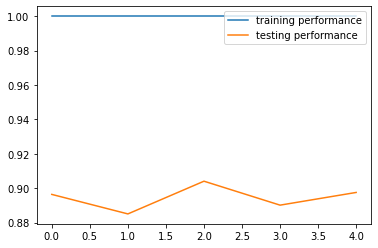

In [16]:
x = [trainscore_1, trainscore_2, trainscore_3, trainscore_4, trainscore_5]
y = [testscore_1, testscore_2, testscore_3, testscore_4, testscore_5]
print(y)
plt.plot(x, label = "training performance")
plt.plot(y, label = "testing performance")
leg = plt.legend(loc='upper right')

How do the performances differ across different train-validation splits? How are the validation performances compared to the training performances in general? What may be the reason?

The training performances usually return a higher accuracy score while the validation performances are lower. While I was creating the different train-validation scenarios, I noticed that all of my training models were returning a 1.0 accuracy score. This could perhaps be due to overfitting, which then denigrates the accuracy of the validation model. Overfitting of the model could have also led to the differences in performances across the different train-validation splits.

## Problem 2

**Cross-validation** is useful for comparing different algorithms. In a similar way, **cross-validation** can also be used to tune your learning model. If you take a look at the **Scikit-Learn** documentation of **Decision Tree**, you can see there are many parameters that we can specify when initiating a model. These are called **hyper-parameters** because they are not learned by the model but control how the model learns. You can think of the model as a learning machine and the **hyper-parameters** as knobs to configure the machine. Depending on how you choose the values of these **hyper-parameters**, the resulting model may have varying performances. We can use **cross-validation** to compared between different models of the same learning algorithm but with different **hyper-parameter settings**. 

Which values should we specify for the **hyper-parameters** of our learning algorithm? That depends on the task. As data scientists, we need to understand the mearning of each **hyper-parameter** and the effect it may have on the learning process. For this problem, you are free to consult any learning resource but you need to answer in your own words.

a) Explain the meanings and effects of the following hyper-parameters of **Decision Tree**. The effects mean what happens when you vary the value of a hyper-parameter:


Maximum depth:
The depth of a decision tree is measured by how many splits the tree makes before coming to a decision or prediction. The maximum depth of a decison tree, therefore, is the longest pathway from the root of the tree (the node starting the graph) to the leaf of the tree (the final decision where the branch doesn't split anymore). On the way up from the root to the leaf, the model goes through different decision nodes, which are essentially questions or places where the tree splits. The deeper that a tree is (meaning, the more decisions or splits it has), means that it has a huge number of splits. A huge number of splits means that the tree may be too complex, and it could lead to overfitting. When you vary the value of a tree's maximum depth, you need to choose a depth that avoids underfitting or overfitting the model. 

Split criterion:
The split criterion for a decision tree is the criteria that we use to split the data for testing and training. In other words, we need to consider what's important to us when we split our data into a training set and a testing set. For example, we could have 3 classes: kiwis, apples, and mangoes. We can split the classes by the criteria that it needs to split into kiwis for testing and apples/mangoes for training, apples for testing and kiwis/mangoes for trianing, and mangoes for testing and kiwis/apples for training. There are a lot of different ways that we can decide on our split criterion, such as considering every twentieth percentile (20%, 40%, 60%, 80%, 100%), or other methods. We want to have split criterion in order to compare split points and choose the best hyper-parameters for our decision tree pathway. If there are too few splits, the tree will be underfit and if there are too many splits, the tree will be overfit. 

b) Explain the meanings and effects of the following hyper-parameters of **Random Forest**. The effects mean what happens when you vary the value of a hyper-parameter:


Number of base learners/ estimators:
A base learner / estimator in a random forest is each decision tree in a random forest. Each base learner or estimator could yield poor estimates. If we have a random forest, we want to have a huge number of trees, especially if we have weak estimators. Due to the weak law of large numbers, we can see that the ensemble (the random forest) will tend towards a prediction as the number of trees (base learners / estimators) tends towards infinity. Therefore, we want to have a LOT of trees. 

Maximum number of test features:
"Features" are some sort of property of our data, for example names, ages, age, etc. They're usually the column names. When we create a random forest, it looks for the best features to use among some random subset of features. This is usually better than just looking for a feaure while we're splitting the node in each individual tree because it introduces a lot more diversity into the model. We can measure the importance of each feature to see which ones we should drop (if they don't contribute too little or nothing at all to the prediction process). If we select a lot of features, then we can increase the strength of each individual tree, while if we select a low number of features, we increase the strength of the forest. 

## Problem 3

In this problem, we will implement hyper-parameter tuning for both Decision Tree and Random Forest. 

Remember we distinguished between **test** and **validation** in Problem 1? Here is the reason. Typically, while tuning the hyperparameters, the model is not allowed to see the testing set. If we use the performance of the model on the testing set to guide the hyper-parameter tuning, our model's configuration will be biased towards the examples in the testing set. As a result, our model's testing performance is no longer a proxy for its performance on future unseen data. As a rule of thumb, no test data is allowed during training and tuning a machine learning model.

To guide our model through hyper-parameter tuning, we need to further reserve a portion of our data as the **validation set**. In total, we split our data into 3 sets: a **training set**, a **validation set**, and a **test set**. Our model will be trained on the **training set** and evaluated on the **validation set**. Based on the model's **validation performance**, we make changes to the values of its **hyper-parameters**, a.k.a **tuning**, and repeat the train-validation process. Once we are happy with the hyper-parameters of our model, we can now test it on the testing set and use the result as a proxy for future performances.

We can do even better. Instead of only one train-validation scenario, we can create multiple train-validation scenarios via **cross-validation**. The **average performance** of the model on the scenarios is used to guide the tuning process.

<br>
<center>
<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width=600 height=400>
</center>
<br>


**Hyper-parameter tuning** consists of cross-validation nested within an outer loop that iterates through a list of hyper-parameter combinations. For example, if each hyper-parameter set consists of 2 hyper-parameters **Maximum depth** and **Split criterion**. If we want to check **Maximum depths** in [1,2,3,4,5] and **Split criteria** in ["gini","entropy"] then there are **2 x 5 = 10 hyper-parameter combinations**. For each combination, we initiate a model with the corresponding hyper-parameters and record the cross-validation average performance.


First, let's again import our data from '**bean.csv**. Split the data into a **training set** (80%) and a **testing set** (20%). We will do **hyper-parameter tuning** via **cross-validation** on the training set.

In [17]:
# import beans csv
bean = pd.read_csv("~/Desktop/class/bean.csv")

# shuffling the data
bean = bean.sample(frac=1).reset_index(drop=True)

# split data into training/validation set and testing set
bean_train = bean.iloc[:10888]
bean_test = bean.iloc[10888:]

# drop last column to make df x
x = bean_train.drop(columns = ["Class"]).copy()

# select column 17 (class) to make df y
y = bean_train["Class"]

x_test = bean_test.drop(columns = ["Class"]).copy()
y_test = bean_test["Class"]


a) Let us try a simple tuning for the hyper-parameter Maximum depth of Decision Tree. The values of the depth are in [2,3,5,8,15]. For the cross-validation step, you can use the cross_validate function from Scikit-Learn. Record the average training performance and validating performance for each value of depth.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [19]:
depths = [2,3,5,8,15]
depth_train_scores = []
depth_valid_scores = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_validate(estimator=tree, X=x, y=y, cv=5, return_train_score = True)
    depth_train_score = np.mean(scores['train_score'])
    depth_valid_score = np.mean(scores['test_score'])
    depth_train_scores.append(depth_train_score)
    depth_valid_scores.append(depth_valid_score)
    
print(depths, depth_train_scores)
print(depths, depth_valid_scores)

[2, 3, 5, 8, 15] [0.6577195045234255, 0.7750964093724748, 0.8904986463530216, 0.9403012620726713, 0.9932494315157168]
[2, 3, 5, 8, 15] [0.6547576234217567, 0.7714915893810954, 0.8798679575645375, 0.8987871364077152, 0.8946543144730809]


Plot the **training performances** and **testing performances** versus the **maximum depths**. What are the general trends. What may be the reason?

(0.63, 1.0)

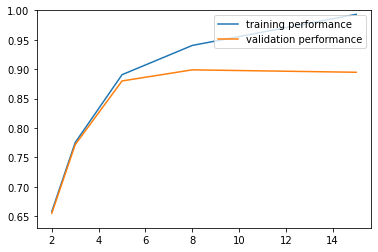

In [20]:
y = [2,3,5,8,15]
plt.plot(y, depth_train_scores, label = "training performance")
plt.plot(y, depth_valid_scores, label = "validation performance")
leg = plt.legend(loc='upper right')
plt.ylim([0.63,1])

Past a certain point, as the maximum depth of the tree increases, the training performance accuracy score increases wihle the validation performance accuracy score decreases. This may be because a deeper tree means a more complex model, which leads to overfitting of the training model. This overfitting thus leads to a sharp increase in training performance accuracy accompanied by a simultaneous drop in testing performance accuracy. 

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [21]:
# depth of 5
x = bean_train.drop(columns = ["Class"]).copy()
y = bean_train["Class"]
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x,y)
predictions = tree.predict(x_test)
test_score = accuracy_score(y_test, predictions)
print('Decision Tree depth 5 testing performance', test_score)

Decision Tree depth 5 testing performance 0.8868894601542416


The testing performance is not as good as the training performance (as expected), but it returns approximately the same accuracy score as the cross-validation performance.

b) Do the same tuning for the hyper-parameter **Number of base learners** of **Random Forest**. The values are in [5,10,15,20,25,30,35,40,45,50]. Record the average training performance and testing performance for each value.

In [22]:
number_of_base_learners = [5,10,15,20,25,30,35,40,45,50]
base_train_scores = []
base_valid_scores = []
for base in number_of_base_learners:
    tree = RandomForestClassifier(n_estimators = base)
    scores = cross_validate(estimator=tree, X=x, y=y, cv=5, return_train_score = True)
    base_train_score = np.mean(scores['train_score'])
    base_valid_score = np.mean(scores['test_score'])
    base_train_scores.append(base_train_score)
    base_valid_scores.append(base_valid_score)
    
print(number_of_base_learners, base_train_scores)
print(number_of_base_learners, base_valid_scores)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50] [0.9872336216359985, 0.9941219680673485, 0.9971528351197222, 0.9980253532194208, 0.998920833431634, 0.9995178193611123, 0.9995637488581218, 0.9996326246517034, 0.9997015004452848, 0.9998852026173803]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50] [0.9088909304343389, 0.9142173815661099, 0.9155951716606495, 0.9175237572197525, 0.9189020534825856, 0.9204627812344853, 0.9205542711535111, 0.9210138297831956, 0.9201872569601305, 0.9201870038759837]


Plot the **training performances** and **testing performances** versus the **number of base learners**. What are the general trends. What may be the reason?

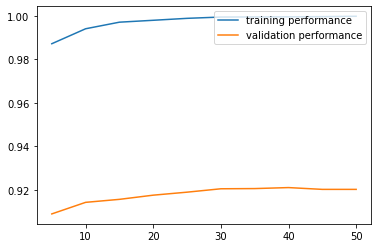

In [23]:
number_of_base_learners = [5,10,15,20,25,30,35,40,45,50]
plt.plot(number_of_base_learners, base_train_scores, label = "training performance")
plt.plot(number_of_base_learners, base_valid_scores, label = "validation performance")
leg = plt.legend(loc='upper right')

Generally, as the number of base learners increases, the training and validation performances increase as well. With more trees comes more diversity, as each individual tree learns from a random sample and splits at each node based on a random set of features. As I mentioned prevoiusly (refer to problem 2B), due to the weak law of large numbers, we want a bigger number of base learners, especially if they are weak estimators. 

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [24]:
# 50 base learners
tree = RandomForestClassifier(n_estimators = 50)
tree.fit(x,y)
predictions = tree.predict(x_test)
test_score = accuracy_score(y_test, predictions)
print('Random Forest 50 Base Learners testing performance', test_score)

Random Forest 50 Base Learners testing performance 0.927653323540213


The testing performance yields a lower accuracy score than the training performance, but an approximately equivalent accuracy score to the cross-validation performance. 

## Problem 4

**This is an open-ended problem**

We are going to train a binary classifier for a set of red points and another binary classifier for a set of blue points. 

You are given a red dataset in '**R.csv**' and a blue dataset in '**B.csv**'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [25]:
red = pd.read_csv("~/Desktop/class/R.csv")
blue = pd.read_csv("~/Desktop/class/B.csv")
red_x = red.drop(columns = "0")
red_y = red["0"]
blue_x = blue.drop(columns = "1")
blue_y = blue["1"]

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm from Scikit-Learn. 

In [26]:
from sklearn import svm
from sklearn import metrics

In [50]:
# train red classifier using svm
red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(red_x, red_y, test_size = 0.2)
red_classifier = svm.SVC(kernel = 'linear')
red_classifier.fit(red_x_train, red_y_train)
red_y_predict = red_classifier.predict(red_x_test)
print("Red Accuracy:", metrics.accuracy_score(red_y_test, red_y_predict))

# train blue classifier using svm
blue_x_train, blue_x_test, blue_y_train, blue_y_test = train_test_split(blue_x, blue_y, test_size = 0.2)
blue_classifier = svm.SVC(kernel = 'linear')
blue_classifier.fit(blue_x_train, blue_y_train)
blue_y_predict = blue_classifier.predict(blue_x_test)
print("Blue Accuracy:", metrics.accuracy_score(blue_y_test, blue_y_predict))
print("Red Coefficient", red_classifier.coef_)
print("Blue Coefficient", blue_classifier.coef_)
print("Red Intercept", red_classifier.intercept_)
print("Blue Intercept", blue_classifier.intercept_)


Red Accuracy: 0.96875
Blue Accuracy: 0.9375
Red Coefficient [[0.05126917 1.76644738]]
Blue Coefficient [[0.00389515 1.51133017]]
Red Intercept [-1.40695099]
Blue Intercept [-0.13824949]


What are the **decision boundaries** of the classifiers? Are they the same? What does it tell you about the difference between the **R** population and the **B** population. The **decision boundary** is the values that separate the positive instances from the negative instances. For example, if a classifier decides that all instances with feature value > 5 are positive and all instances with feature value < 5 are negative, then 5 is the decision boundary of that classifier. You can answer by showing/contrasting the decision boundaries on a figure/figures.

The decision boundary for the R population is the plane satisfying (0.05126917 1.76644738)*x - 1.40695099 = 0.
The decision boundary for the B population is the plane satisfying (0.00389515 1.51133017)*x  - 0.13824949 = 0.
*asterisk symbol refers to dot product

c) Now, imagine that we combine the **R** population and the **B** population into one single population. Given the classifiers that we trained from the previous part, how should the joint classifier be chosen so that it is fair to both groups? How would you express the fairness constraint explicitly? (**Note**: Don't worry about right or wrong here)

As a motivation, consider a real example in which you work for a financial company that accepts loan application. You have data of people from two different areas of your city, each with a different social-economic situation. Normally, our company has internal processes to deal with people from either areas (2 classifiers where positive means granting loan and negative means no loan). However, due to COVID-19, we are not in a good financial state right now so we can only grant loans to a limited number of people from either areas. If we only care about profit, we will just give loans to those in the better area, but is it socially fair to those from the other area? How should we adjust/combine our internal processes (the classifiers) to process the applications in a fair way.

Firstly, I would introduce a categorical variable that distinguishes between the R and B populations. Then, I either manually change the decision boundaries after fitting the model to ensure that the model is fairly distributed, or I can adjust the cost function (the measure of error) if the distribution of assignments leads to unfair outputs. I would do this by calculating the "unfairness" and adjust the cost function accordingly.